In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# get titanic data as a pandas DataFrame
tdf = pd.read_csv("titanic_data.csv")

# preview the data
tdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
#     VARIABLE DESCRIPTIONS:
#     survival        Survival
#                     (0 = No; 1 = Yes)
#     pclass          Passenger Class
#                     (1 = 1st; 2 = 2nd; 3 = 3rd)
#     name            Name
#     sex             Sex
#     age             Age
#     sibsp           Number of Siblings/Spouses Aboard
#     parch           Number of Parents/Children Aboard
#     ticket          Ticket Number
#     fare            Passenger Fare
#     cabin           Cabin
#     embarked        Port of Embarkation
#                     (C = Cherbourg; Q = Queenstown; S = Southampton)


In [4]:
# Questions:

# 1. Survival with age, family or wealth relation

# 

In [5]:
# remove not relevant to question columns
tdf = tdf.drop(['PassengerId','Name','Ticket', 'Cabin', 'Sex', 'Embarked'], axis=1)

In [6]:
# Check data information

tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [7]:
# There is values missing from Age column
# Filling NaN age with mean values

tdf = tdf.fillna(tdf['Age'].mean())

-0.549499619944 correlation


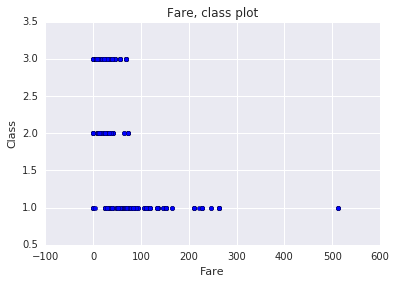

In [8]:
# Fare and Pclass columns could be aggregated into wealth

fare, pclass = pd.Series(tdf['Fare']), pd.Series(tdf['Pclass'])
print (pclass.corr(fare, 'pearson'), 'correlation')

plt.title("Fare, class plot")
plt.xlabel("Fare")
plt.ylabel("Class")
plt.scatter(fare, pclass)

# Some of first class passangers paid lower than average price for tickets, which is interesting,
# yet moderate correlation is still present between these values (negative, because 1st class is the highest)

# Because of moderate correlation people that had higher class assumably also paid higher fare price,
# no reason to keep both columns and assumably
wealth = fare

# Pclass discard
tdf = tdf.drop(['Pclass'], axis=1)

In [9]:
# Number of Siblings/Spouses Aboard
# and Number of Parents/Children Aboard
# contribute to family factor

sibsp, parch = pd.Series(tdf['SibSp']), pd.Series(tdf['Parch'])

# Mapping passengers with relatives to 1, single to 0

def to_zero_or_one(number):
    if number == 0:
        return 0 
    return 1

family = sibsp | parch
family = family.apply(to_zero_or_one)

In [10]:
# Standartize wealth
wealth = (wealth - wealth.mean()) / wealth.std()

# Format float numbers display to 2 numbers after decimal point
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
# Replace old columns for new 
tdf['Family'] = family
tdf['Wealth'] = wealth
tdf = tdf.drop(['Parch','SibSp', 'Fare'], axis=1)

In [12]:
# Only 4 question related columns left
tdf.head()

,Survived,Age,Family,Wealth
0,0,22.00,1,-0.50
1,1,38.00,1,0.79
2,1,26.00,0,-0.49
3,1,35.00,1,0.42
4,0,35.00,0,-0.49


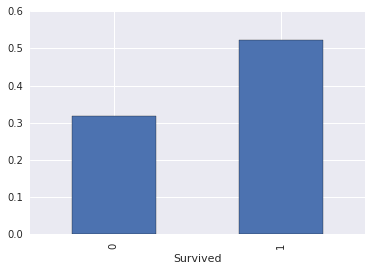

In [13]:
# Showing family (1) mean bars for people who survived and did not
tdf.groupby('Survived').mean()['Family'].plot(kind='bar')
tdf.groupby('Survived')['Family']
# Survivers a lot more frequently had relatives on board

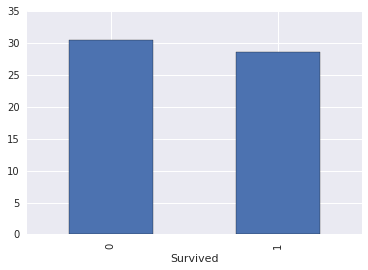

In [14]:
# Same for age (2)
tdf.groupby('Survived').mean()['Age'].plot(kind='bar')
# Average age of survivers is only a bit lower (2 years)

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

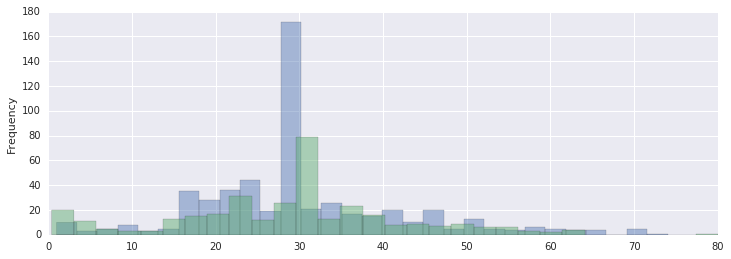

In [15]:
# More detailed age histogram
# shows many victims to be 16 to 25 years old or have
# missing age values (29 years mode peak given by filling in mean values instead)

age = tdf.groupby('Survived')['Age']
age.plot(kind='hist', bins=30, alpha=0.44, figsize=(12,4))

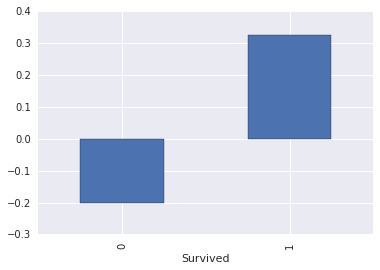

In [16]:
# and wealth (3)
# Mean wealth is significantly higher for survivers 
tdf.groupby('Survived').mean()['Wealth'].plot(kind='bar')

In [17]:
# Conclusion:
# Survivers tended to be wealthy, also tended to have relatives among other passengers